In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
data = pd.read_csv("advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.tail()


,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 5)

In [6]:
Xs = data.drop(['Sales', 'Unnamed: 0'], axis=1)
y = data['Sales'].values.reshape(-1,1)
#x_train, x_test, y_train, y_test = train_test_split(Xs,y,test_size = 0.3) #Train is 70% and Test is 30% 
x_train, x_test, y_train, y_test = train_test_split(Xs,y,random_state=1) # default split is 75% for training and 25% for testing
# 200 records : 75% train = 150 and 25% test = 50
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
reg = LinearRegression()
reg.fit(x_train, y_train)


(150, 3)
(50, 3)
(150, 1)
(50, 1)


LinearRegression()

In [7]:
print("Slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)

Slope:  [[0.04656457 0.17915812 0.00345046]]
Intercept:  [2.87696662]


In [8]:
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))


The linear model is: Y = 2.877 + 0.046565*TV + 0.17916*radio + 0.0034505*newspaper


In [10]:
# make predictions on the testing set

y_pred = reg.predict(x_test)
print(y_pred)

[[21.70910292]
 [16.41055243]
 [ 7.60955058]
 [17.80769552]
 [18.6146359 ]
 [23.83573998]
 [16.32488681]
 [13.43225536]
 [ 9.17173403]
 [17.333853  ]
 [14.44479482]
 [ 9.83511973]
 [17.18797614]
 [16.73086831]
 [15.05529391]
 [15.61434433]
 [12.42541574]
 [17.17716376]
 [11.08827566]
 [18.00537501]
 [ 9.28438889]
 [12.98458458]
 [ 8.79950614]
 [10.42382499]
 [11.3846456 ]
 [14.98082512]
 [ 9.78853268]
 [19.39643187]
 [18.18099936]
 [17.12807566]
 [21.54670213]
 [14.69809481]
 [16.24641438]
 [12.32114579]
 [19.92422501]
 [15.32498602]
 [13.88726522]
 [10.03162255]
 [20.93105915]
 [ 7.44936831]
 [ 3.64695761]
 [ 7.22020178]
 [ 5.9962782 ]
 [18.43381853]
 [ 8.39408045]
 [14.08371047]
 [15.02195699]
 [20.35836418]
 [20.57036347]
 [19.60636679]]


In [11]:
def myfunc(TV,radio,newspaper):
  Y = 2.877 + 0.046565*TV + 0.17916*radio + 0.0034505*newspaper
  return Y
predictedsales = myfunc(39.5,41.1,10.8)
print("Predicted Sales is ", predictedsales)

Predicted Sales is  12.117058900000002


In [12]:
def myfunc(TV,radio):
  Y = Y = 2.927 + 0.0466*TV + 0.1811*radio
  return Y
predictedsales = myfunc(39.5,41.1)
print("Predicted Sales is ", predictedsales)

Predicted Sales is  12.21091


In [13]:
from sklearn.metrics import mean_absolute_error 
predictions = reg.predict(x_test)
mae = mean_absolute_error(y_test,predictions)
print("Mean Absolute Error = ",mae)

Mean Absolute Error =  1.066891708259521


In [14]:
from sklearn.metrics import mean_squared_error
predictions = reg.predict(x_test)
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error = ",mse)

Mean Squared Error =  1.9730456202283355


In [15]:
from sklearn.linear_model import LinearRegression
predictions = reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

Root Mean Squared Error =  1.4046514230328946


In [16]:
reg.score(Xs, y)

0.8963161233045729

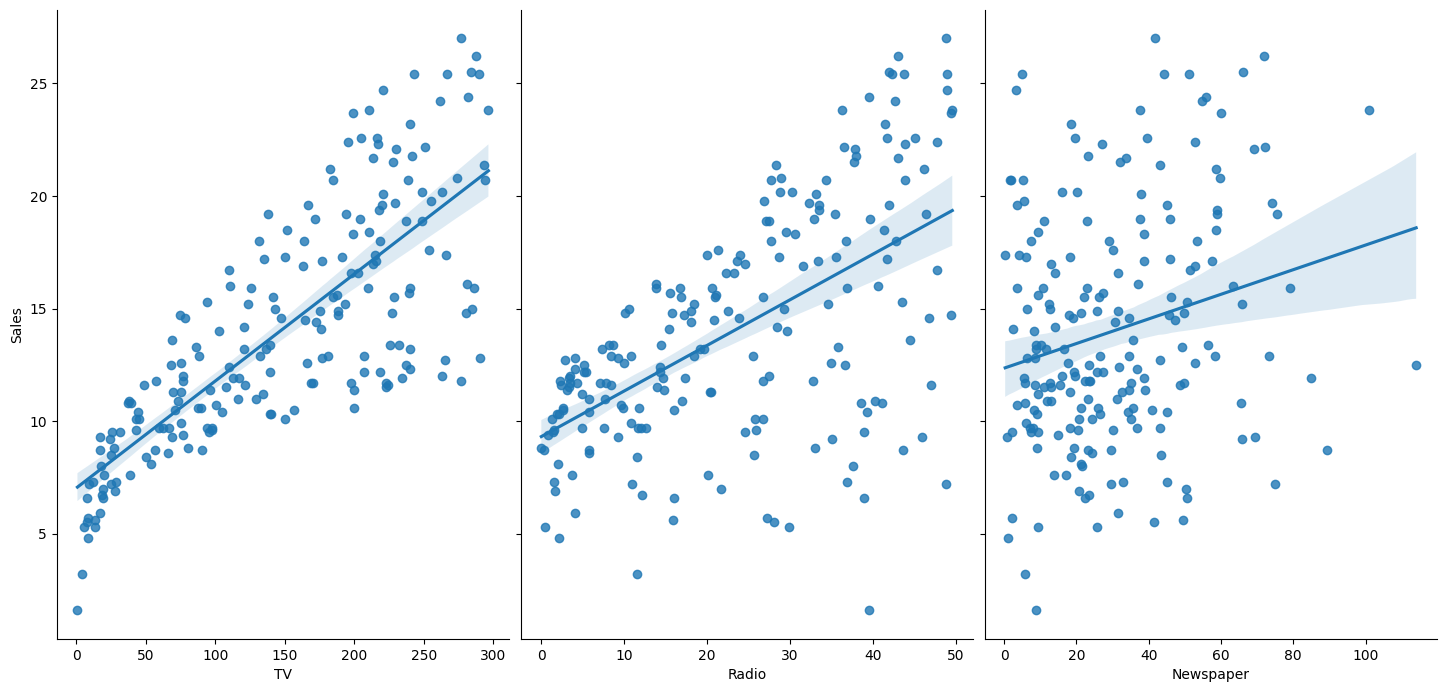

In [22]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')